In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

In [52]:
# Uploading data
booking = pd.read_csv("bookings.txt", sep=",")
booking.head()

,hotel,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,canceled
0,City Hotel,February,9,21,1,0,2,BB,ESP,Online TA,TA/TO,A,A,0,No Deposit,Transient,91.0,0,1,1
1,City Hotel,July,29,17,1,0,2,SC,SWE,Online TA,TA/TO,A,A,0,No Deposit,Transient,140.0,0,2,1
2,City Hotel,July,29,22,1,1,2,HB,DEU,Offline TA/TO,TA/TO,A,A,0,No Deposit,Transient-Party,122.4,0,1,0
3,City Hotel,March,11,9,0,3,2,BB,USA,Online TA,TA/TO,B,B,0,No Deposit,Transient,77.5,0,2,1
4,City Hotel,September,38,11,1,0,2,SC,GBR,Online TA,TA/TO,A,A,0,No Deposit,Transient,89.0,0,2,0


In [40]:
## Data Cleaning: checking

In [123]:
booking.dtypes

# Checking missing values
missing_counts = booking.isnull().sum()
cols_with_missing = missing_counts[missing_counts > 0]

if len(cols_with_missing) == 0:
    print("All columns have complete data: no missing n/A")
else:
    print("Columns with missing values:")
    print(cols_with_missing)

# Summary of each column
booking.describe(include='all')

All columns have complete data: no missing n/A


,hotel,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,canceled,total_nights
count,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000,...,5000,5000,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
unique,2,12,NaN,NaN,NaN,NaN,NaN,4,90,7,...,8,10,NaN,3,4,NaN,NaN,NaN,NaN,NaN
top,City Hotel,August,NaN,NaN,NaN,NaN,NaN,Bed & Breakfast,PRT,Online TA,...,A,A,NaN,No Deposit,Transient,NaN,NaN,NaN,NaN,NaN
freq,3258,585,NaN,NaN,NaN,NaN,NaN,3807,2048,2347,...,3551,3068,NaN,4396,3725,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,27.061800,15.708600,0.906600,2.489800,1.863000,NaN,NaN,NaN,...,NaN,NaN,0.219000,NaN,NaN,102.669692,0.065000,0.574200,0.365200,3.396400
std,NaN,NaN,13.531585,8.791311,0.971012,1.826955,0.482781,NaN,NaN,NaN,...,NaN,NaN,0.673446,NaN,NaN,48.879693,0.248168,0.793864,0.481534,2.435334
min,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,70.000000,0.000000,0.000000,0.000000,2.000000
50%,NaN,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,94.500000,0.000000,0.000000,0.000000,3.000000
75%,NaN,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,126.000000,0.000000,1.000000,1.000000,4.000000


In [45]:
## Variables

In [81]:
# Creating variables
booking['total_nights'] = booking['stays_in_weekend_nights'] + booking['stays_in_week_nights']

# Modifying variables
booking['meal'] = booking['meal'].replace({'BB': 'Bed & Breakfast', 'FB': 'Full Board', 'HB': 'Half Board', 'SC': 'No Meal', 'Undefined': 'No Meal'})

In [ ]:
# Formatting arrival date
# Choose 2024 = the most recent leap year
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
booking['month_num'] = booking['arrival_date_month'].map(month_map)

booking['arrival_date'] = pd.to_datetime({
    'year': 2024,
    'month': booking['month_num'],
    'day': booking['arrival_date_day_of_month']
}, errors='coerce')

# Formatting leaving date
booking['departure_date'] = booking['arrival_date'] + pd.to_timedelta(booking['total_nights'], unit='D')

In [ ]:
## 1. Distribution of variables

In [ ]:
# Proportion of cancelled bookings
cancellation_rate = booking['canceled'].mean()
print(f"Overall cancellation rate: {cancellation_rate:.2%}")

Overall cancellation rate: 36.52%


In [107]:
# Distribution of numerical variabes
num_vars = ['canceled', 'adults', 'total_nights', 'required_car_parking_spaces', 'total_of_special_requests', 'booking_changes', 'adr']

num_summary = pd.DataFrame({
    'Mean': booking[num_vars].mean(),
    'Median': booking[num_vars].median(),
    'Std dev': booking[num_vars].std(),
    'Min': booking[num_vars].min(),
    'Max': booking[num_vars].max()
}).round(2)

display(
    num_summary.style
    .set_caption("Distribution of numerical variables")
    .format(precision=2)
)

,Mean,Median,Std dev,Min,Max
canceled,0.37,0.00,0.48,0.00,1.00
adults,1.86,2.00,0.48,0.00,4.00
total_nights,3.40,3.00,2.44,0.00,28.00
required_car_parking_spaces,0.06,0.00,0.25,0.00,2.00
total_of_special_requests,0.57,0.00,0.79,0.00,5.00
booking_changes,0.22,0.00,0.67,0.00,18.00
adr,102.67,94.50,48.88,0.00,382.00


In [ ]:
# Distribution of categorical variables
cat_vars = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type', 'country', 'deposit_type']
for var in cat_vars:
    print(f"\nDistribution of {var}:")
    print(booking[var].value_counts(normalize=True).round(3)) 

ValueError: could not convert string to float: 'Resort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort HotelResort Hotel %'

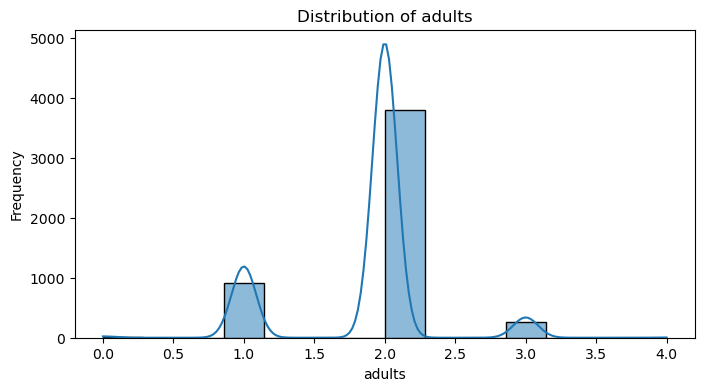

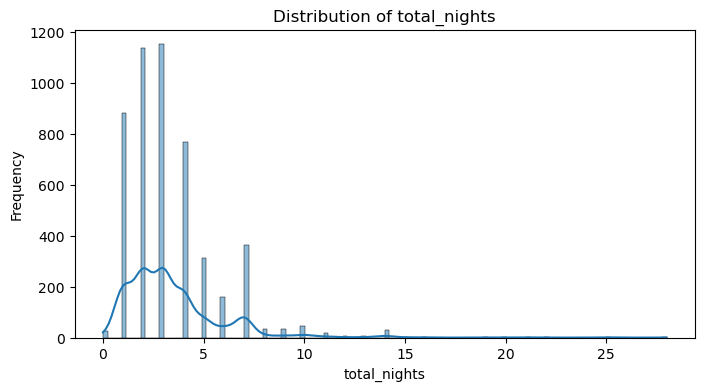

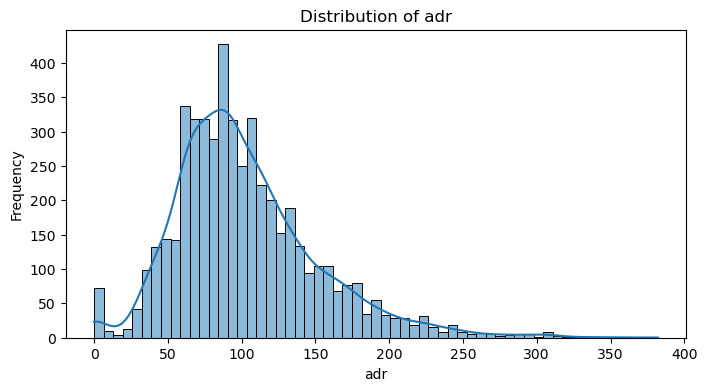

In [119]:
# Graphical representation of numerical variables
for var in ['adults', 'total_nights', 'adr']:
    plt.figure(figsize=(8, 4))
    sns.histplot(booking[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

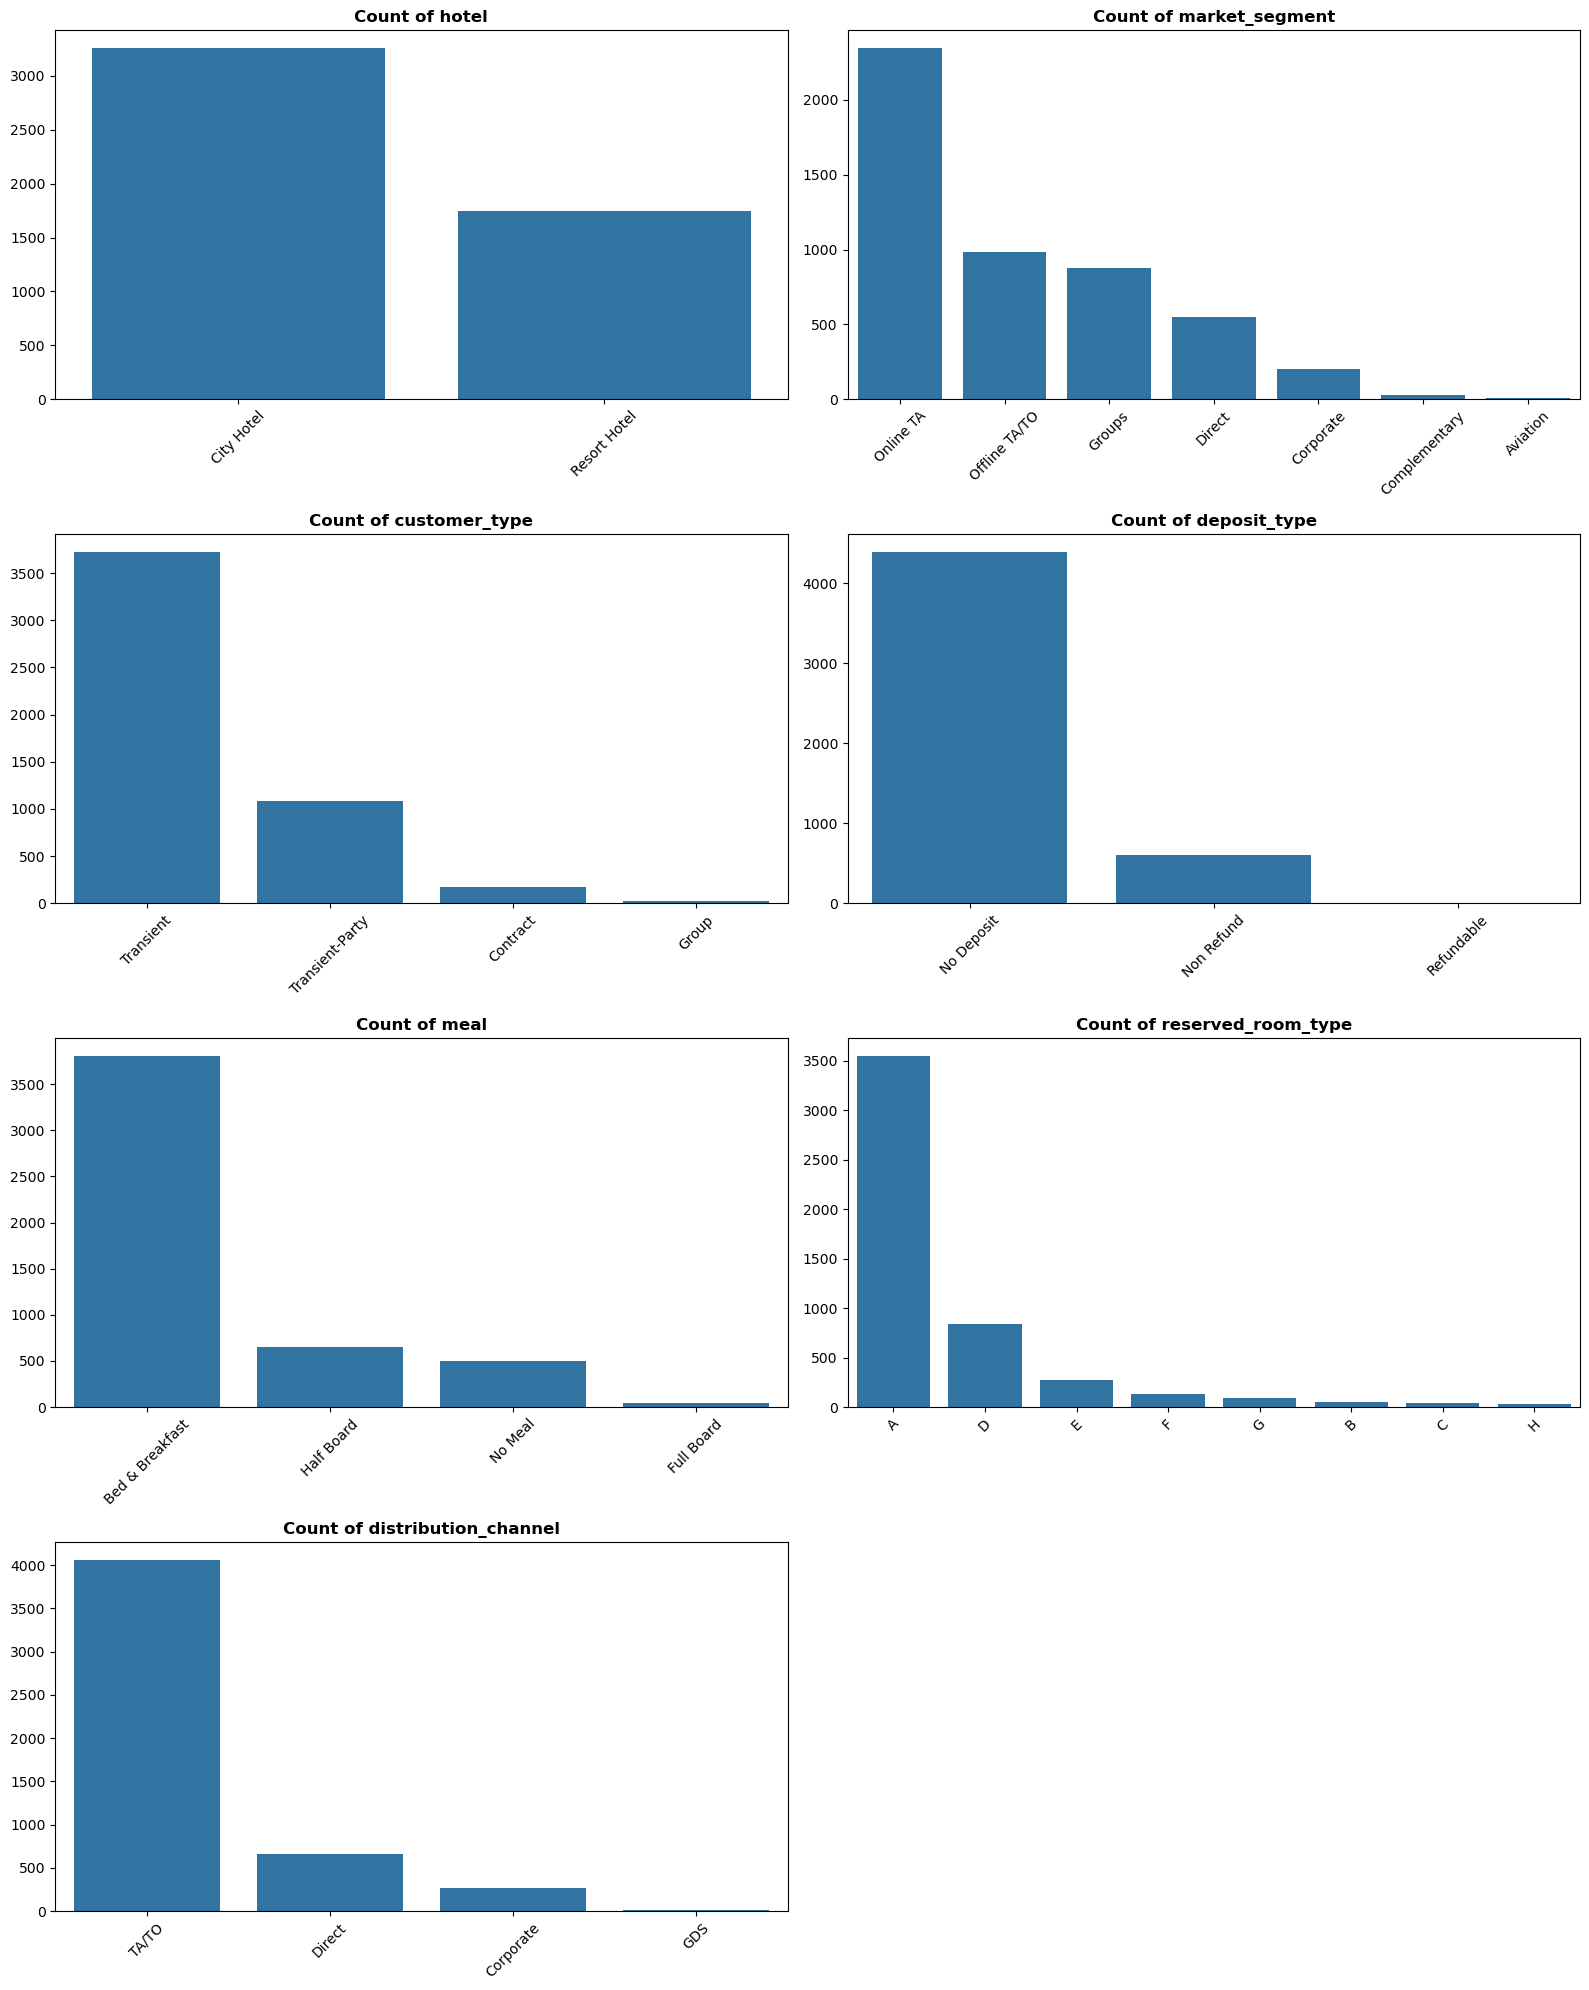

In [118]:
# Graphical representation of categorical variables
cat_vars = ['hotel', 'market_segment', 'customer_type', 'deposit_type', 'meal', 'reserved_room_type', 'distribution_channel']

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(
        data=booking,
        x=var,
        order=booking[var].value_counts().index,
        ax=axes[i]
    )
    axes[i].set_title(f'Count of {var}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
## 2. Cancellation rate related to variables

In [ ]:
# Cancellation rate per day
cancellation_rate = (
    booking.groupby(['arrival_date_month', 'arrival_date_day_of_month'])['canceled']
    .mean()
    .reset_index()
)

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

cancellation_rate['arrival_date_month'] = pd.Categorical(
    cancellation_rate['arrival_date_month'],
    categories=month_order,
    ordered=True
)

heatmap_data = cancellation_rate.pivot(
    index='arrival_date_month',
    columns='arrival_date_day_of_month',
    values='canceled'
)

plt.figure(figsize=(18, 6))
sns.heatmap(
    heatmap_data,
    linewidths=0.5,
    cbar_kws={'label': 'Average daily cancellation rate'},
    cmap='YlGnBu',
)
plt.title("Average daily cancellation rate", fontsize=14)
plt.xlabel("Day of arrival")
plt.ylabel("Month of arrival")
plt.show()

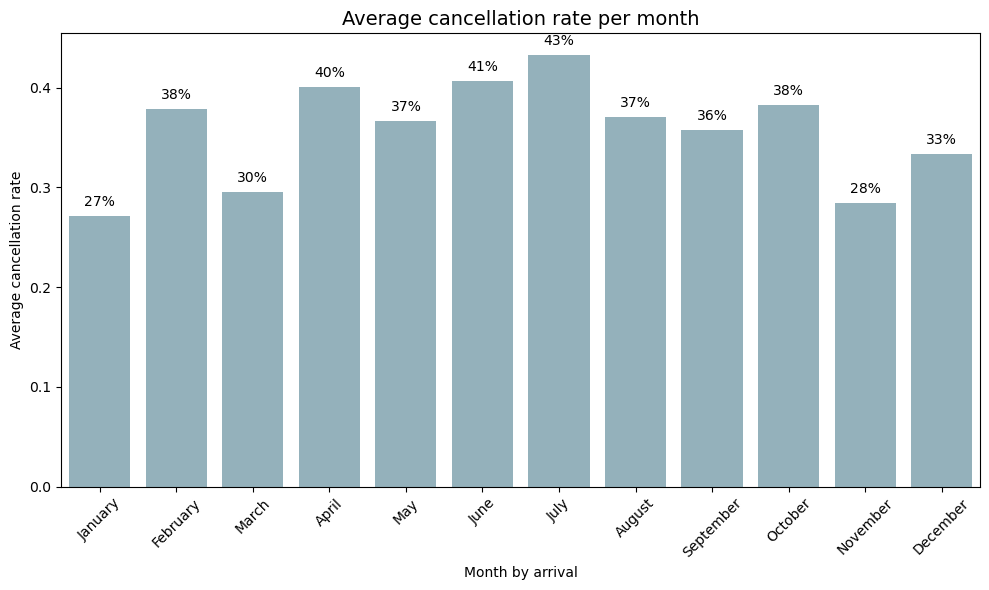

In [76]:
# Cancellation rate per month
cancellation_by_month = (
    booking.groupby('arrival_date_month')['canceled']
    .mean()
    .reset_index()
)

cancellation_by_month['arrival_date_month'] = pd.Categorical(
    cancellation_by_month['arrival_date_month'],
    categories=month_order,
    ordered=True
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=cancellation_by_month,
    x='arrival_date_month',
    y='canceled',
    color="#8EB4C1"
)

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.01,
        f"{p.get_height():.0%}",
        ha='center'
    )

plt.title("Average cancellation rate per month", fontsize=14)
plt.xlabel("Month by arrival")
plt.ylabel("Average cancellation rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

